In [7]:
#Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
# from pprint import pprint
# import yfinance as yf
# import yahoo_fin.stock_info as si
# from yahoo_fin.stock_info import get_data


In [8]:
# Read in csv files from api and web scrape calls
pharma_df = pd.read_csv('Resources/pharma.csv')
pharma_df.head()


,Symbol,Security,GICS Sub-Industry,Market Cap ($Billion),Price ($),Dividend ($),Yield (%),EPS (TTM),PE Ratio (TTM),PEG Ratio (5-Year),Price-Book Ratio
0,JNJ,Johnson & Johnson,Pharmaceuticals,427.617,162.395004,4.04,2.48,5.51,29.48,2.38,6.64
1,MRK,Merck & Co.,Pharmaceuticals,199.012,78.695000,2.60,3.36,4.53,17.38,1.16,6.68
2,PFE,Pfizer Inc.,Pharmaceuticals,193.682,34.869999,1.56,4.36,1.54,22.67,4.87,3.06
3,LLY,Lilly (Eli) & Co.,Pharmaceuticals,189.963,198.619995,3.40,1.67,6.79,29.26,1.48,41.21
4,ABBV,AbbVie Inc.,Pharmaceuticals,183.185,103.779999,5.20,5.08,4.57,22.70,NaN,11.85


In [9]:
# Read in csv files from api and web scrape calls
daily_df = pd.read_csv('Resources/daily_pharma_data.csv',index_col=0)
daily_df.head()

,JNJ_close,JNJ_volume,JNJ_return,MRK_close,MRK_volume,MRK_return,PFE_close,PFE_volume,PFE_return,LLY_close,...,ALXN_return,VTRS_close,VTRS_volume,VTRS_return,CTLT_close,CTLT_volume,CTLT_return,PRGO_close,PRGO_volume,PRGO_return
2015-01-02,104.519997,5753600,NaN,57.189999,7076300,NaN,29.724857,16371571,NaN,70.059998,...,NaN,56.349998,1398000,NaN,27.510000,187300,NaN,166.630005,710700,NaN
2015-01-05,103.790001,8079300,-0.007033,58.040001,15961200,0.014645,29.563566,24786391,-0.005456,69.370003,...,-0.024318,55.720001,2996200,-0.011306,28.080000,455200,0.020299,164.910004,725500,-0.010430
2015-01-06,103.279999,7428000,-0.004938,60.320000,24287700,0.037798,29.810247,29468681,0.008275,69.720001,...,-0.023715,54.180000,6610900,-0.028424,26.549999,622100,-0.057627,164.600006,878500,-0.001883
2015-01-07,105.559998,7931700,0.021599,61.610001,18634500,0.020938,30.218216,20248816,0.013501,69.230003,...,0.053105,56.110001,3663000,0.034397,27.809999,457200,0.045307,167.350006,851300,0.016433
2015-01-08,106.389999,9916000,0.007802,62.849998,19121000,0.019729,30.834915,49169522,0.020000,70.870003,...,-0.022470,56.650002,3164000,0.009532,27.990000,183800,0.006431,171.169998,1117200,0.022317


In [23]:
# Read in csv files from api and web scrape calls
returns_df = pd.read_csv('Resources/daily_returns.csv',index_col=0)
returns_df.head()

,JNJ_return,PFE_return,LLY_return,PRGO_return,CTLT_return,VTRS_return,ALXN_return,ZTS_return,ABBV_return,MRK_return,SPY_return
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.007033,-0.005456,-0.009947,-0.010430,0.020299,-0.011306,-0.024318,-0.006040,-0.019180,0.014645,-0.018392
2015-01-06,-0.004938,0.008275,0.005020,-0.001883,-0.057627,-0.028424,-0.023715,-0.009852,-0.004974,0.037798,-0.009509
2015-01-07,0.021599,0.013501,-0.007078,0.016433,0.045307,0.034397,0.053105,0.020225,0.038847,0.020938,0.012308
2015-01-08,0.007802,0.020000,0.023141,0.022317,0.006431,0.009532,-0.022470,0.015165,0.010350,0.019729,0.017436


In [24]:
# Read in csv files from api and web scrape calls
close_df = pd.read_csv('Resources/close_price_data.csv',index_col=0)
close_df.head()

,JNJ,PFE,LLY,PRGO,CTLT,VTRS,ALXN,ZTS,ABBV,MRK
2015-01-02,104.519997,29.724857,70.059998,166.630005,27.510000,56.349998,186.600006,43.310001,65.889999,57.189999
2015-01-05,103.790001,29.563566,69.370003,164.910004,28.080000,55.720001,182.169998,43.049999,64.650002,58.040001
2015-01-06,103.279999,29.810247,69.720001,164.600006,26.549999,54.180000,177.949997,42.630001,64.330002,60.320000
2015-01-07,105.559998,30.218216,69.230003,167.350006,27.809999,56.110001,187.929993,43.509998,66.930000,61.610001
2015-01-08,106.389999,30.834915,70.870003,171.169998,27.990000,56.650002,183.800003,44.180000,67.629997,62.849998


In [25]:
# Build color map to highligh top three pharma equities by market cap
colors = {'JNJ':'orange','PFE':'orange','LLY':'orange', 'MRK':'blue','ABBV':'blue','ZTS':'blue','ALXN':'blue','VTRS':'blue','CTLT':'blue','PRGO':'blue' }

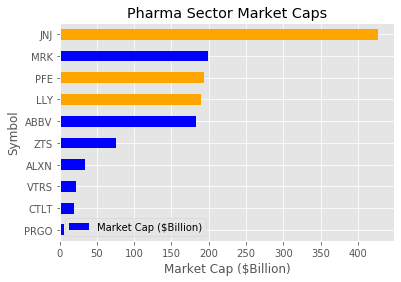

In [26]:
# Bar plot by market cap
plt.style.use('ggplot')
pharma_df.sort_values("Market Cap ($Billion)",ascending=True).plot.barh('Symbol','Market Cap ($Billion)',
                                                                        color=pharma_df.sort_values("Market Cap ($Billion)",ascending=True)['Symbol'].replace(colors))
plt.xlabel('Market Cap ($Billion)')
plt.title("Pharma Sector Market Caps")
plt.savefig('output_data/mkt_cap.png')

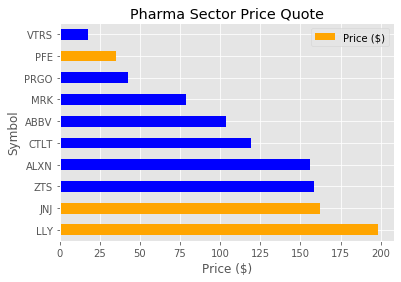

In [27]:
# Bar plot by Price
plt.style.use('ggplot')
pharma_df.sort_values("Price ($)",ascending=False).plot.barh('Symbol','Price ($)',
                                                             color=pharma_df.sort_values('Price ($)',ascending=False)['Symbol'].replace(colors))
plt.xlabel('Price ($)')
plt.title("Pharma Sector Price Quote")
plt.savefig('output_data/price_cap.png')

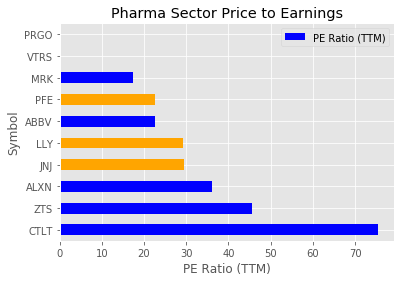

In [28]:
# Bar plot by PE Ratio
plt.style.use('ggplot')
pharma_df.sort_values("PE Ratio (TTM)",ascending=False).plot.barh('Symbol','PE Ratio (TTM)',
                                                                  color=pharma_df.sort_values('PE Ratio (TTM)',ascending=False)['Symbol'].replace(colors))
plt.xlabel('PE Ratio (TTM)')
plt.title("Pharma Sector Price to Earnings")
plt.savefig('output_data/PE_cap.png')

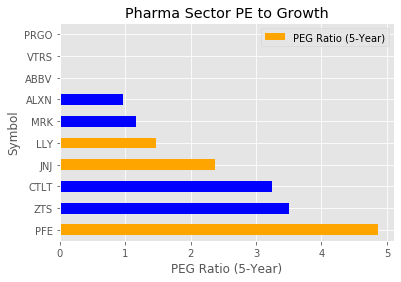

In [29]:
# Bar plot by PEG Ratio
plt.style.use('ggplot')
pharma_df.sort_values("PEG Ratio (5-Year)",ascending=False).plot.barh('Symbol','PEG Ratio (5-Year)',
                                                                      color=pharma_df.sort_values('PEG Ratio (5-Year)',ascending=False)['Symbol'].replace(colors))
plt.xlabel('PEG Ratio (5-Year)')
plt.title("Pharma Sector PE to Growth")
plt.savefig('output_data/peg_cap.png')

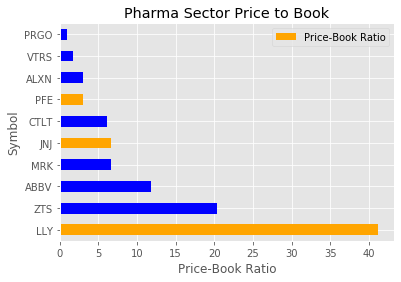

In [30]:
# Bar plot by PB Ratio
plt.style.use('ggplot')
pharma_df.sort_values("Price-Book Ratio",ascending=False).plot.barh('Symbol','Price-Book Ratio',
                                                                    color=pharma_df.sort_values('Price-Book Ratio',ascending=False)['Symbol'].replace(colors))
plt.xlabel('Price-Book Ratio')
plt.title("Pharma Sector Price to Book")
plt.savefig('output_data/pb_cap.png')

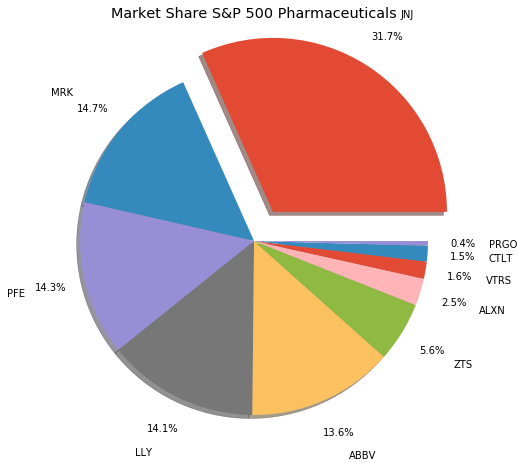

In [31]:
#Create pie chart for market share by market cap
plt.figure(figsize=(8,8))
plt.style.use('ggplot')
labels = pharma_df['Symbol']
explode = (0.2,0,0,0,0,0,0,0,0,0)
plt.pie(pharma_df['Market Cap ($Billion)'], labels=labels, explode=explode, shadow=True,autopct='%1.1f%%',
        pctdistance=1.2, labeldistance=1.35)

plt.title("Market Share S&P 500 Pharmaceuticals")
plt.savefig('output_data/mkt_share.png')
plt.show()

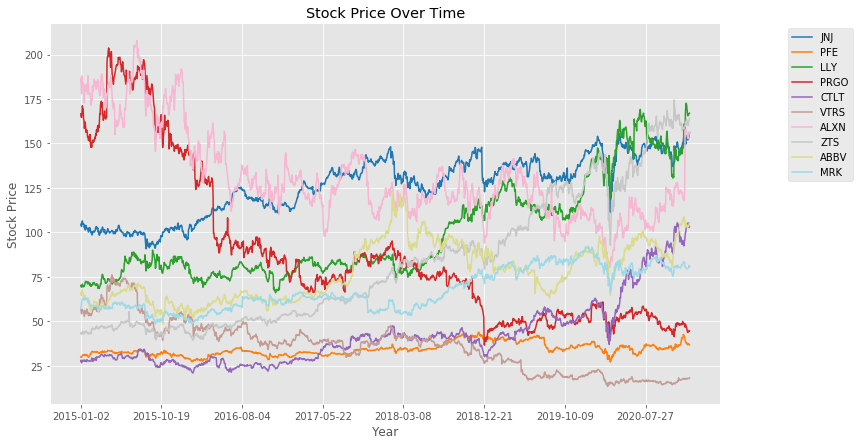

In [32]:
#Create line plot of close prices
plt.style.use('ggplot')
close_plot = close_df.plot.line(figsize =(12,7),cmap='tab20')
plt.ylabel('Stock Price')
plt.xlabel('Year')
plt.title('Stock Price Over Time')
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper center',labels=['JNJ','PFE','LLY','PRGO','CTLT',
                                                               'VTRS','ALXN','ZTS','ABBV','MRK'])
plt.savefig('output_data/price_trend.png')
plt.show()

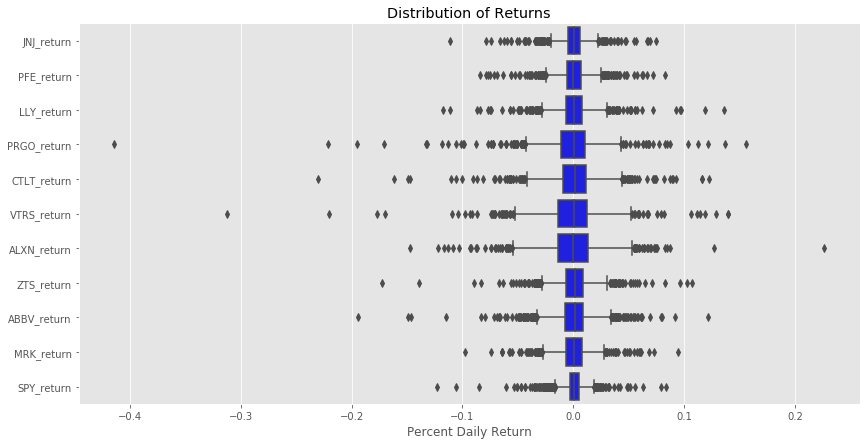

In [34]:
plt.figure(figsize =(14, 7))
plt.style.use('ggplot')

my_pal = {ticker: "orange" if (ticker == 'JNJ') | (ticker == 'PFE') | (ticker == 'LLY')
                    else "blue" for ticker in returns_df.columns.tolist()}

ax = sns.boxplot(data=returns_df, orient="h", palette=my_pal)

# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 

# Set X label
plt.xlabel('Percent Daily Return')

# Adding title  
plt.title("Distribution of Returns")
plt.savefig('output_data/return_dist.png')